# Wrangling Data Project 



This project mainly focuses on wrangling WeRateDogs Twitter account data by gathering the account data, assessing data quality and tidiness issues, and cleaning the data. In this project, we will wrangle, analyze, and visualize the data using helpful Python libraries.

## Gathering Data

In [1]:
#install and import needed libraries
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data from twitter-archive-enhanced.csv file
tw_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
tw_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# download the image predictions file using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#get the response code
response

<Response [200]>

In [5]:
with open('image_predictions.tsv' , mode='wb') as file:
    file.write(response.content)

# load image predictions file
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True



I applied for a Twitter developer account to access Twitter API, but unfortunately, I got rejected. And because of the time limitation,  I used the provided code by Udacity and accessed the project data by reading the given JSON file. 


In [ ]:
# from timeit import default_timer as timer
# from tweepy import OAuthHandler

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'XXXX'
# consumer_secret = 'XXXX'
# access_token = 'XXXX'
# access_secret = 'XXXX'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)


# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = tw_archive_df.tweet_id.values
# len(tweet_ids)


# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()

# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
        
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
obj_list = []

#read the json file and load the data into a dataframe
with open('tweet-json.txt') as json_file:

    for obj in json_file:
        tweet_data = json.loads(obj)   
        obj_list.append({'tweet_id': tweet_data['id'],
                        'retweets': tweet_data['retweet_count'],
                        'favorites': tweet_data['favorite_count']})
        

tweet_df = pd.DataFrame(obj_list)
tweet_df.head(10)

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data 


In this section, I'll assess the three dataframes visually and programmatically for quality and tidiness issues.        
Collected data have been loaded into dataframes in the previous section, the following dataframes are the dataframes that will be assessed and manipulated :
- tw_archive_df
- image_predictions_df
- tweet_df


### tw_archive_df  dataframe


In [7]:
tw_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
#get some information about tw_archive_df
tw_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
#retrieve the retweets rows
tw_archive_df[tw_archive_df['retweeted_status_id'].isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [10]:
#retrieve the replies rows
tw_archive_df[tw_archive_df['in_reply_to_status_id'].isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [11]:
#view some basic statistical details(for rating_numerator and rating_denominator variables)
tw_archive_df.describe()[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [12]:
tw_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
#above result shows that there are too large numbers set as a numerator
#retrieve some of the rows to find out the reasons behind that 
pd.set_option('display.max_colwidth', -1)
tw_archive_df[tw_archive_df['rating_numerator']>20]

<ipython-input-13-21d04e5350ce>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


In [14]:
tw_archive_df.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [15]:
#The ratings should almost always have a denominator of 10, while the above result shows some other numbers that were setten as a denominator
#retrieve some of the rows to find out the reasons behind that 
pd.set_option('display.max_colwidth', -1)
tw_archive_df[tw_archive_df['rating_denominator']>10]

<ipython-input-15-878e3896ee7c>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a hr

In [16]:
pd.set_option('display.max_colwidth', -1)
tw_archive_df[tw_archive_df['rating_denominator']<10]

<ipython-input-16-0175f944bfa6>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [17]:
tw_archive_df.name.value_counts()

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
           .. 
Halo       1  
Trigger    1  
Mike       1  
Lassie     1  
Ricky      1  
Name: name, Length: 957, dtype: int64


Identified issues for tw_archive_df dataframe:

Quality issues:
- name column has None values instead of NaN (The None value won't be counted as a null value) 
- tweet_id datatype is incorrect
- timestamp datatype is incorrect
- some rows are retweets or replies
- erroneous numerator values (for example, the number 75 was assigned to the numerator variable while it was a fraction, and the number 960  was mentioned as an invalid rating and it also was extracted as a numerator)
- erroneous denominator values (for example, dates were extracted as a denominator)
- 'a' was extrated as a dog name more than 50 times 

Tidiness issues:
- the dog categories distributed between four columns (Doggo, Floor, Pupper, and Puppo) 
- 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id', and 'in_reply_to_user_id' columns are useless since the retweets and replies will be dropped




### image_predictions_df  dataframe


In [18]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
#make sure that there are no duplicated IDs 
image_predictions_df[tw_archive_df['tweet_id'].duplicated()]

<ipython-input-20-dd1708d0abdc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  image_predictions_df[tw_archive_df['tweet_id'].duplicated()]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Identified issues for image_predictions_df dataframe:

Quality issues:
- tweet_id datatype is incorrect
- some values in p1,p2, and p3 columns start with a capital letter, and some values start with a small letter.


Tidiness issues:
- data values about the same observations spread out over image_predictions_df table and tw_archive_df table (we should combine the two dataframes)

### tweet_df  dataframe


In [21]:
tweet_df

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [22]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   retweets   2354 non-null   int64
 2   favorites  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


Identified issues for tweet_df dataframe:

Quality issues:
- tweet_id datatype is incorrect


Tidiness issues:
- total number of retweets and favorites in a separate dataframe (we should combine the two columns with tw_archive_df)

## Cleaning Data

In [23]:
#create a copy for each dataframe
tw_archive_df_clean = tw_archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
tweet_df_clean = tweet_df.copy()

### Define:
Replace 'None' values in name column with 'NaN'

### Code:


In [24]:
tw_archive_df_clean['name']=tw_archive_df_clean['name'].replace('None',np.nan)

### Test:

In [25]:
len(tw_archive_df_clean[tw_archive_df_clean['name']=='None'])

0

### Define:
Convert the datatype of tweet_id (Int to String) in all dataframes (tw_archive_df, image_predictions_df, and tweet_df).
### Code:

In [26]:
tw_archive_df_clean.tweet_id= tw_archive_df_clean.tweet_id.astype(str)
tweet_df_clean.tweet_id=tweet_df_clean.tweet_id.astype(str)
image_predictions_df_clean.tweet_id=image_predictions_df_clean.tweet_id.astype(str)

### Test:

In [27]:
tw_archive_df_clean.info(), image_predictions_df_clean.info(), tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       2356 

(None, None, None)

### Define:
Convert the datatype of timestamp (String to Date)  


### Code:

In [28]:
tw_archive_df_clean.timestamp=pd.to_datetime(tw_archive_df_clean.timestamp)

### Test:

In [29]:
tw_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Define:
Select the retweets' rows indexes and store them in a list, then drop the rows with these indexes to keep the original tweets only in the table.

### Code:

In [30]:
#select the retweets indexes
retweets_indexes=tw_archive_df_clean[tw_archive_df_clean['retweeted_status_id'].isnull()==False].index.tolist()

#drop the rows
tw_archive_df_clean=tw_archive_df_clean.drop(tw_archive_df_clean.index[retweets_indexes])

### Test:

In [31]:
tw_archive_df_clean[tw_archive_df_clean['retweeted_status_id'].isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define:
Select the replies' rows indexes and store them in a list, then drop the rows with these indexes to keep the original tweets only in the table.
### Code:

In [32]:
tw_archive_df_clean.reset_index(drop=True,inplace=True)

#select the replies indexes
replies_indexes=tw_archive_df_clean[tw_archive_df_clean['in_reply_to_status_id'].isnull()==False].index.tolist()

#drop the rows
tw_archive_df_clean=tw_archive_df_clean.drop(tw_archive_df_clean.index[replies_indexes])

### Test:

In [33]:
tw_archive_df_clean[tw_archive_df_clean['in_reply_to_status_id'].isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


After assessing the numerator values and denominator values, it turned out that most of the large numerators and denominators were extracted mistakenly (for example, the number 75 was assigned to the numerator variable while it was a fraction, the number 960 was mentioned as an invalid rating and it also was extracted as a numerator, and dates were extracted as a denominator). Since these values have a huge impact on the data analysis process, and there are just 35 values as shown below, dropping them will not affect the data, but it can make a huge impact when analyzing the rating data.


In [34]:
len(tw_archive_df_clean[tw_archive_df_clean['rating_numerator']>20])

18

In [35]:
len(tw_archive_df_clean[tw_archive_df_clean['rating_denominator']!=10])

17

### Define:
Drop the rows with ratings numerators>20 from the table
### Code:

In [36]:
#retrieve rows with rating_numerator<20 
tw_archive_df_clean=tw_archive_df_clean[tw_archive_df_clean['rating_numerator']<20]

### Test:

In [37]:
tw_archive_df_clean[tw_archive_df_clean['rating_numerator']>20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define:
Drop the rows with ratings denominator<10 or >10 from the table


### Code:


In [38]:
#retrieve rows with rating_denominator=10 
tw_archive_df_clean= tw_archive_df_clean[tw_archive_df_clean['rating_denominator']==10]

### Test:


In [39]:
tw_archive_df_clean[tw_archive_df_clean['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define:
Replace the dog name 'a' with NaN, since 'a' is incorrect name

### Code:


In [40]:
tw_archive_df_clean['name']=tw_archive_df_clean['name'].replace('a',np.nan)

### Test:

In [41]:
len(tw_archive_df_clean[tw_archive_df_clean['name']=='a'])

0

### Define:
Merge tw_archive_df dataframe with tweet_df dataframe on 'tweet_id'  

### Code:

In [42]:
tw_archive_df_clean = pd.merge(tw_archive_df_clean,tweet_df_clean, how='left', on='tweet_id')

### Test:

In [43]:
#verify the change
tw_archive_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,9774,41048


### Define:
Drop the 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', and 'in_reply_to_user_id' columns since they are useless after we dropped the retweets and replies rows.

### Code:

In [44]:
tw_archive_df_clean = tw_archive_df_clean.drop(['retweeted_status_id','retweeted_status_user_id', 
                                                'retweeted_status_timestamp'
                                                , 'in_reply_to_status_id','in_reply_to_user_id'], axis=1)

### Test:

In [45]:
tw_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   object             
 1   timestamp           2075 non-null   datetime64[ns, UTC]
 2   source              2075 non-null   object             
 3   text                2075 non-null   object             
 4   expanded_urls       2072 non-null   object             
 5   rating_numerator    2075 non-null   int64              
 6   rating_denominator  2075 non-null   int64              
 7   name                1431 non-null   object             
 8   doggo               2075 non-null   object             
 9   floofer             2075 non-null   object             
 10  pupper              2075 non-null   object             
 11  puppo               2075 non-null   object             
 12  retweets            2075 non-null 

### Define:
Melt the Doggo, Floor, Pupper, and Puppo columns to a dog_category column, then sort values based on dog_category and drop the duplicates rows using tweet_id to identify the duplication.


### Code:


In [46]:
# Melt the columns into a column'dog_category' 
tw_archive_df_clean = pd.melt(tw_archive_df_clean, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name','retweets', 'favorites'],
                          value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],
                              var_name='caegory',
                              value_name='dog_category' ) 

#delete caegory column
tw_archive_df_clean=tw_archive_df_clean.drop('caegory', axis=1)


#sort the values and delete the duplicated data
tw_archive_df_clean=tw_archive_df_clean.sort_values('dog_category').drop_duplicates('tweet_id',keep='last')


### Test:


In [47]:
tw_archive_df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,dog_category
2842,749403093750648834,2016-07-03 00:43:15+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Duuun dun... duuun dun... dunn dun. dunn dun. dun dun dun dun dun dun dun dun dun dun dun dun dun dun dun. 10/10 https://t.co/9qdJ2Q1Cwx,https://twitter.com/dog_rates/status/749403093750648834/photo/1,10,10,NaN,622,2892,None
1946,668297328638447616,2015-11-22 05:17:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2 rare dogs. They waddle (v inefficient). Sometimes slide on bellies. Right one wants to be aircraft Marshall. 9/10s https://t.co/P8bivfp5sU,https://twitter.com/dog_rates/status/668297328638447616/photo/1,9,10,NaN,319,656,None
274,831322785565769729,2017-02-14 02:02:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pete. He has no eyes. Needs a guide doggo. Also appears to be considerably fluffy af. 12/10 would hug softly https://t.co/Xc0gyovCtK,https://twitter.com/dog_rates/status/831322785565769729/photo/1,12,10,Pete,1744,10042,doggo
5404,692417313023332352,2016-01-27 18:42:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https://t.co/VGaIMktX10,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7,10,Herschel,3917,10275,pupper
3588,678380236862578688,2015-12-20 01:03:46+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Crumpet. He underestimated the snow. Quickly retreating. 10/10 https://t.co/a0Zx5LDFZa,https://twitter.com/dog_rates/status/678380236862578688/photo/1,10,10,Crumpet,1020,2655,None


In [48]:
tw_archive_df_clean.dog_category.value_counts()

None       1740
pupper     229 
doggo      72  
puppo      24  
floofer    10  
Name: dog_category, dtype: int64

### Define:
Convert each value in p1,p2, and p3 columns to lower case to maintain the consistent occurrence of the first letters.


### Code:

In [49]:
image_predictions_df_clean.p1 =image_predictions_df_clean.p1.str.lower()
image_predictions_df_clean.p2 =image_predictions_df_clean.p2.str.lower()
image_predictions_df_clean.p3 =image_predictions_df_clean.p3.str.lower()


### Test:

In [50]:
sum(image_predictions_df_clean.p1.str.isupper()), sum(image_predictions_df_clean.p2.str.isupper()),sum(
    image_predictions_df_clean.p3.str.isupper())

(0, 0, 0)

### Define:
Merge tw_archive_df dataframe with image_predictions_df dataframe on 'tweet_id'  


### Code:


In [51]:
tw_archive_df_clean = pd.merge(tw_archive_df_clean, image_predictions_df_clean, how='left', on='tweet_id')

### Test:


In [52]:
tw_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   object             
 1   timestamp           2075 non-null   datetime64[ns, UTC]
 2   source              2075 non-null   object             
 3   text                2075 non-null   object             
 4   expanded_urls       2072 non-null   object             
 5   rating_numerator    2075 non-null   int64              
 6   rating_denominator  2075 non-null   int64              
 7   name                1431 non-null   object             
 8   retweets            2075 non-null   int64              
 9   favorites           2075 non-null   int64              
 10  dog_category        2075 non-null   object             
 11  jpg_url             1949 non-null   object             
 12  img_num             1949 non-null 

### Define:
After merging all dataframes, we have to convert the datatype of p1_dog, p2_dog, and p3_dog (String to Boolean)

### Code:

In [56]:
tw_archive_df_clean.p1_dog=tw_archive_df_clean.p1_dog.astype(bool)
tw_archive_df_clean.p2_dog=tw_archive_df_clean.p2_dog.astype(bool)
tw_archive_df_clean.p3_dog=tw_archive_df_clean.p3_dog.astype(bool)

### Test:

In [58]:
tw_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   object             
 1   timestamp           2075 non-null   datetime64[ns, UTC]
 2   source              2075 non-null   object             
 3   text                2075 non-null   object             
 4   expanded_urls       2072 non-null   object             
 5   rating_numerator    2075 non-null   int64              
 6   rating_denominator  2075 non-null   int64              
 7   name                1431 non-null   object             
 8   retweets            2075 non-null   int64              
 9   favorites           2075 non-null   int64              
 10  dog_category        2075 non-null   object             
 11  jpg_url             1949 non-null   object             
 12  img_num             1949 non-null 

## Store the clean dataframe:



In [61]:
tw_archive_df_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyze And Visualize Data

### Average ratings for the most common dog breeds




For the most common dog breeds, we will find the average rating for each.

In [62]:
common_breeds=tw_archive_df_clean.p1.value_counts()[:10].keys().to_list()
common_breeds

['golden_retriever',
 'labrador_retriever',
 'pembroke',
 'chihuahua',
 'pug',
 'chow',
 'samoyed',
 'toy_poodle',
 'pomeranian',
 'malamute']

In [63]:
common_breeds_df=tw_archive_df_clean[tw_archive_df_clean['p1'].isin(common_breeds)]
common_breeds_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
4,667453023279554560,2015-11-19 21:22:56+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,96,327,...,1.0,labrador_retriever,0.825670,True,french_bulldog,0.056639,True,staffordshire_bullterrier,0.054018,True
6,667470559035432960,2015-11-19 22:32:36+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11,10,NaN,102,273,...,1.0,toy_poodle,0.304175,True,pug,0.223427,True,lakeland_terrier,0.073316,True
8,667495797102141441,2015-11-20 00:12:54+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9,10,Philippe,294,565,...,1.0,chihuahua,0.143957,True,christmas_stocking,0.118651,False,ski_mask,0.092482,False
9,667502640335572993,2015-11-20 00:40:05+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11,10,Hall,231,563,...,1.0,labrador_retriever,0.996709,True,golden_retriever,0.001688,True,beagle,0.000712,True
14,667530908589760512,2015-11-20 02:32:25+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy",https://twitter.com/dog_rates/status/667530908589760512/photo/1,10,10,Naphaniel,264,501,...,1.0,golden_retriever,0.633037,True,kuvasz,0.146391,True,labrador_retriever,0.046184,True


In [64]:
common_breeds_df.groupby('p1').mean()['rating_numerator']

p1
chihuahua             10.692308
chow                  11.609756
golden_retriever      11.567164
labrador_retriever    11.131868
malamute              10.896552
pembroke              11.443182
pomeranian            11.189189
pug                   10.240741
samoyed               11.700000
toy_poodle            11.054054
Name: rating_numerator, dtype: float64

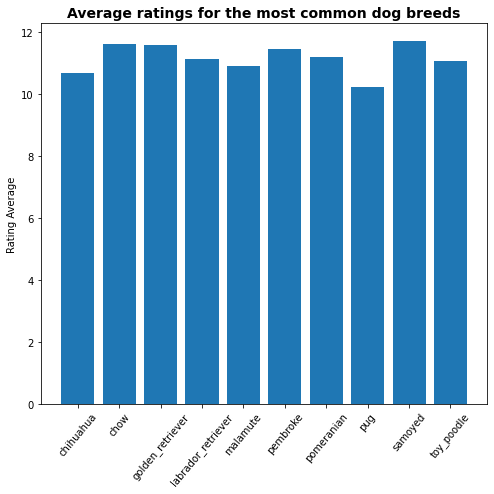

In [65]:
%matplotlib inline


# Create a bar chart with proper labels
locations = [1,2,3,4,5,6,7,8,9,10]
heights = common_breeds_df.groupby('p1').mean()['rating_numerator'].to_list()
labels = common_breeds_df.groupby('p1').mean()['rating_numerator'].keys().to_list()
plt.figure(figsize=(8,7))

plt.bar(locations, heights, tick_label=labels)
plt.title('Average ratings for the most common dog breeds',fontsize=14, fontweight='bold')
plt.xticks(rotation=50)
plt.ylabel('Rating Average')
plt.show();

As shown above, the most common ten dog breeds that appeared the most in our sample have a rating average between 10-11 out of ten, which indicates the effectiveness of dog breeds on rating scores. The above chart shows that generally, the most common dog breeds get high rating averages.

*Note: According to the account owners' explanation, when the dogs are good enough, they give them a rating score greater than ten, 11/10, 12/10, 13/10, etc.

### Relationship between retweets and favorites


In [66]:
new_df = tw_archive_df_clean[['retweets','favorites']]
new_df

,retweets,favorites
0,234,489
1,89,326
2,257,483
3,620,833
4,96,327
...,...,...
2070,716,3277
2071,2697,16755
2072,3917,8157
2073,3240,11416


In [67]:
#find the Correlation Coefficients between variables
tw_archive_df_clean.corr(method='pearson')

,rating_numerator,rating_denominator,retweets,favorites,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
rating_numerator,1.000000,NaN,0.310834,0.407833,0.192380,0.100160,0.298704,0.007800,0.258757,-0.025868,0.241669
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweets,0.310834,NaN,1.000000,0.911282,0.106374,0.056101,0.015955,-0.019370,0.022153,-0.045724,0.018834
favorites,0.407833,NaN,0.911282,1.000000,0.136356,0.079912,0.054254,-0.022719,0.060295,-0.054008,0.042238
img_num,0.192380,NaN,0.106374,0.136356,1.000000,0.202515,0.031293,-0.158372,0.056125,-0.137203,0.058377
p1_conf,0.100160,NaN,0.056101,0.079912,0.202515,1.000000,0.124690,-0.510418,0.141818,-0.709239,0.117069
p1_dog,0.298704,NaN,0.015955,0.054254,0.031293,0.124690,1.000000,0.110584,0.645761,0.049578,0.568949
p2_conf,0.007800,NaN,-0.019370,-0.022719,-0.158372,-0.510418,0.110584,1.000000,0.096311,0.478778,0.065017
p2_dog,0.258757,NaN,0.022153,0.060295,0.056125,0.141818,0.645761,0.096311,1.000000,0.031226,0.568902
p3_conf,-0.025868,NaN,-0.045724,-0.054008,-0.137203,-0.709239,0.049578,0.478778,0.031226,1.000000,0.035912


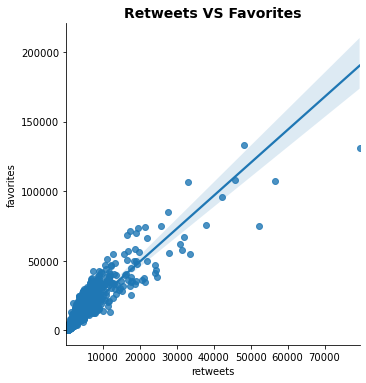

In [68]:

#a scatter plot to illustrates the relationship between retweets and favorites
sns.lmplot(x='retweets', y='favorites', data=new_df)

plt.title('Retweets VS Favorites',fontsize=14, fontweight='bold')
plt.show();

The correlation coefficient measures the strength of the relationship between two variables, so, from the above results, we can conclude that tweets' retweets and favorites are strongly correlated (the correlation coefficient= 0.911282). 
Above is a scatter plot with the best fit line, which illustrates the proportional relationship between tweets' retweets and favorites. As the number of tweet's retweets increase, the number of tweet's likes increase as well.

### Dog Types Distribution



In [69]:
#find value counts for each dog category and exclude null values 
dog_categories=tw_archive_df_clean.dog_category.value_counts()[1:]
dog_categories

pupper     229
doggo      72 
puppo      24 
floofer    10 
Name: dog_category, dtype: int64

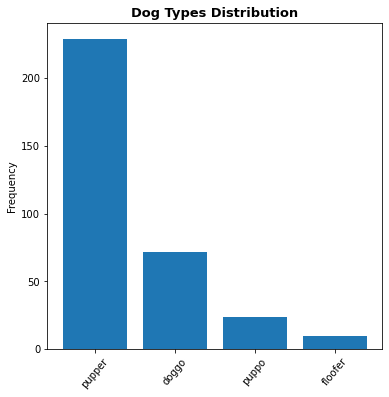

In [70]:

# Create a histogram 
locations = [1,2,3,4]
heights = dog_categories.to_list()
labels = dog_categories.keys().to_list()
plt.figure(figsize=(6,6))

plt.bar(locations, heights, tick_label=labels)
plt.title('Dog Types Distribution',fontsize=13, fontweight='bold')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.show();

It can be inferred that the most common dog type in our sample is Pupper, followed by Doggo type.